## The Effect of Sequencing Depth on Molecular Cross-Validation

In this notebook we will explore how sequencing depth effects the signal available to a denoiser, and therefore both the optimal denoising parameters as well as the ground-truth loss.

In [1]:
import glob
import os
import pathlib
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["svg.fonttype"] = "none"

In [2]:
results = {}
result_files = glob.glob('../results/*.pickle')

for file in result_files:
    results[os.path.basename(file).split('.')[0]] = pickle.load(open(file, "rb"))

In [3]:
more_result_files = glob.glob('../results/neuron*.*/*.pickle')

for file in more_result_files:
    file = pathlib.Path(file)
    results[f"{file.name.split('.')[0]}_{file.parent.name.split('_')[1]}"] = pickle.load(file.open("rb"))

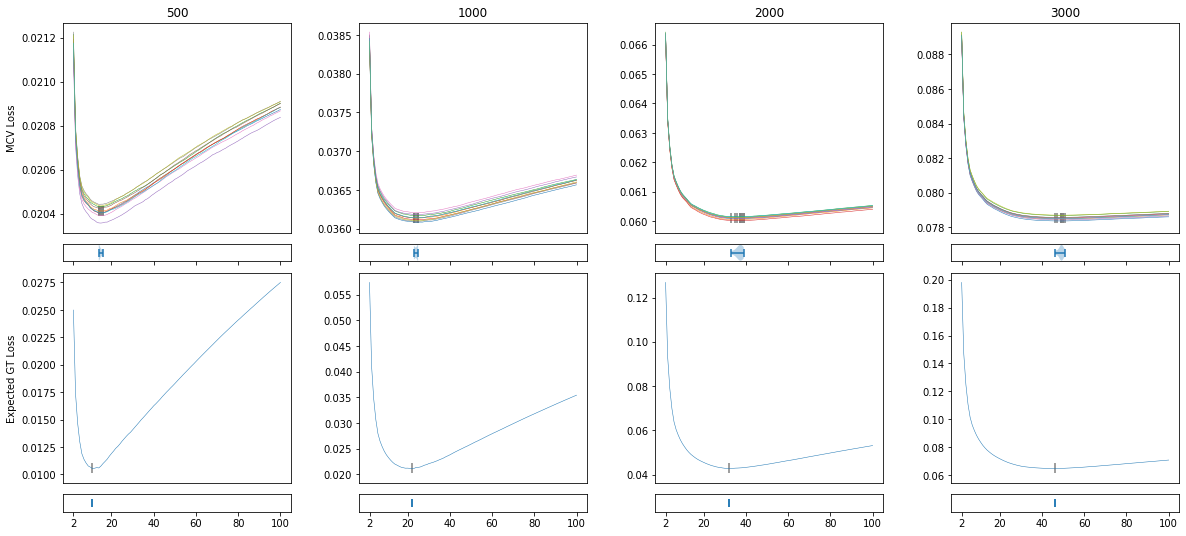

In [4]:
fig,ax = plt.subplots(
    4, 4, figsize=(20, 9), sharex="col",
    gridspec_kw={"wspace": 0.3, "hspace": 0.1, "height_ratios": [12, 1, 12, 1]}
)


for i,key in enumerate(("neuron_500_pca_mse_0", "neuron_1000_pca_mse_0", "neuron_2000_pca_mse_0", "neuron_pca_mse_0")):
    df = results[key]

    for j,loss in zip((0, 2), ("mcv_loss", "gt0_loss")):
        x = df["param_range"].copy()

        if df[loss].ndim == 1:
            y = df[loss][:, None]
        else:
            y = df[loss].T

        x = x[1:]
        y = y[1:]
            
        ax[j, i].plot(x, y, linewidth=0.5)
        ax[j, i].tick_params(bottom=False)

        ax[j, i].scatter(x[y.argmin(0)], np.ones(y.shape[1]) * y.min(0).mean(), marker="|", s=100, color="grey")
        ax[j + 1, i].violinplot(x[y.argmin(0)], vert=False)
        ax[j + 1, i].tick_params(left=False, labelleft=False)

        ax[j + 1, i].set_xticks([2, 20, 40, 60, 80, 100])


for i,lbl in enumerate(("500", "1000", "2000", "3000")):
    ax[0, i].set_title(lbl)

for j,lbl in zip((0, 2), ("MCV Loss", "Expected GT Loss")):
    ax[j, 0].set_ylabel(lbl)

plt.savefig("../figures/Figure_S-TK3_raw.svg")
plt.show()

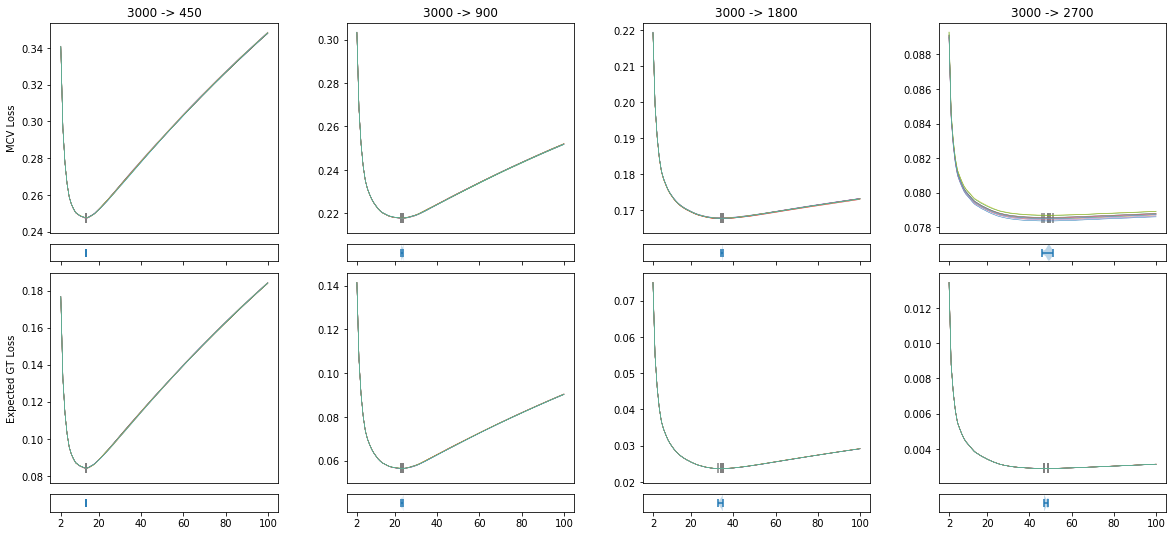

In [5]:
fig,ax = plt.subplots(
    4, 4, figsize=(20, 9), sharex="col",
    gridspec_kw={"wspace": 0.3, "hspace": 0.1, "height_ratios": [12, 1, 12, 1]}
)


for i,key in enumerate(("neuron_pca_mse_0_0.15", "neuron_pca_mse_0_0.3", "neuron_pca_mse_0_0.6", "neuron_pca_mse_0")):
    df = results[key]

    for j,loss in zip((0, 2), ("mcv_loss", "gt1_loss")):
        x = df["param_range"].copy()

        if df[loss].ndim == 1:
            y = df[loss][:, None]
        else:
            y = df[loss].T

        x = x[1:]
        y = y[1:]
            
        ax[j, i].plot(x, y, linewidth=0.5)
        ax[j, i].tick_params(bottom=False)
        ax[j, i].scatter(x[y.argmin(0)], np.ones(y.shape[1]) * y.min(0).mean(), marker="|", s=100, color="grey")

        ax[j + 1, i].violinplot(x[y.argmin(0)], vert=False)
        ax[j + 1, i].tick_params(left=False, labelleft=False)
        ax[j + 1, i].set_xticks([2, 20, 40, 60, 80, 100])


for i,lbl in enumerate(("3000 -> 450", "3000 -> 900", "3000 -> 1800", "3000 -> 2700")):
    ax[0, i].set_title(lbl)

for j,lbl in zip((0, 2), ("MCV Loss", "Expected GT Loss")):
    ax[j, 0].set_ylabel(lbl)

plt.savefig("../figures/Figure_S-TK4_raw.svg")
plt.show()

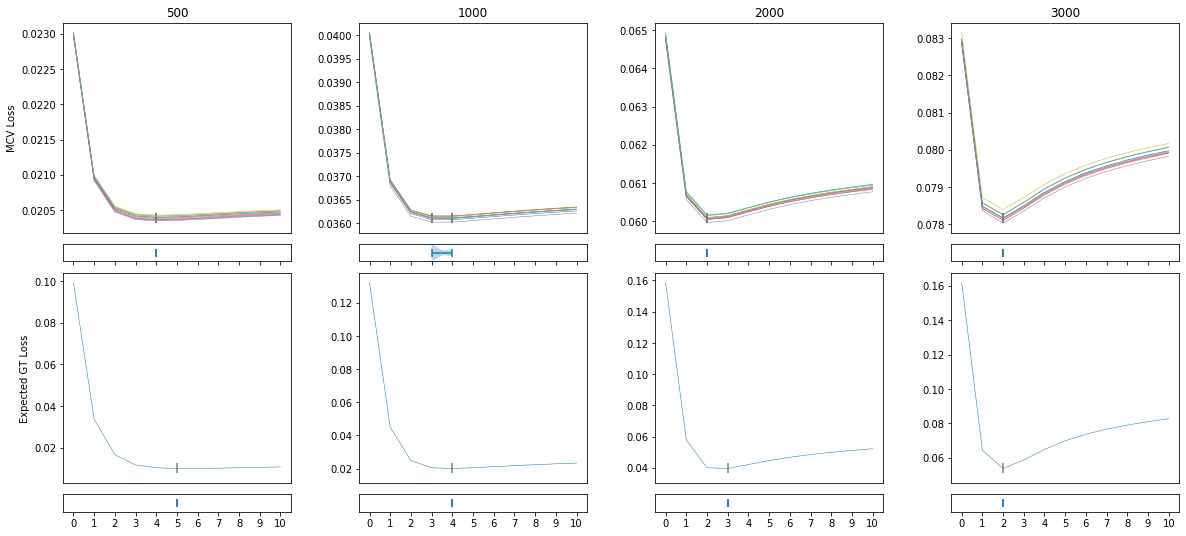

In [6]:
fig,ax = plt.subplots(
    4, 4, figsize=(20, 9), sharex="col",
    gridspec_kw={"wspace": 0.3, "hspace": 0.1, "height_ratios": [12, 1, 12, 1]}
)


for i,key in enumerate(("neuron_500_diffusion_mse_0", "neuron_1000_diffusion_mse_0", "neuron_2000_diffusion_mse_0", "neuron_diffusion_mse_0")):
    df = results[key]

    for j,loss in zip((0, 2), ("mcv_loss", "gt0_loss")):
        x = df["param_range"].copy()

        if df[loss].ndim == 1:
            y = df[loss][:, None]
        else:
            y = df[loss].T

        ax[j, i].plot(np.arange(len(x)), y, linewidth=0.5)
        ax[j, i].set_xticks(np.arange(len(x)))
        ax[j, i].tick_params(bottom=False)
        ax[j, i].scatter(y.argmin(0), np.ones(y.shape[1]) * y.min(0).mean(), marker="|", s=100,  color="grey")

        ax[j + 1, i].violinplot(y.argmin(0), vert=False)
        ax[j + 1, i].tick_params(left=False, labelleft=False)
        ax[j + 1, i].set_xticklabels(x)


for i,lbl in enumerate(("500", "1000", "2000", "3000")):
    ax[0, i].set_title(lbl)

for j,lbl in zip((0, 2), ("MCV Loss", "Expected GT Loss")):
    ax[j, 0].set_ylabel(lbl)

plt.savefig("../figures/Figure_S-TK5_raw.svg")
plt.show()

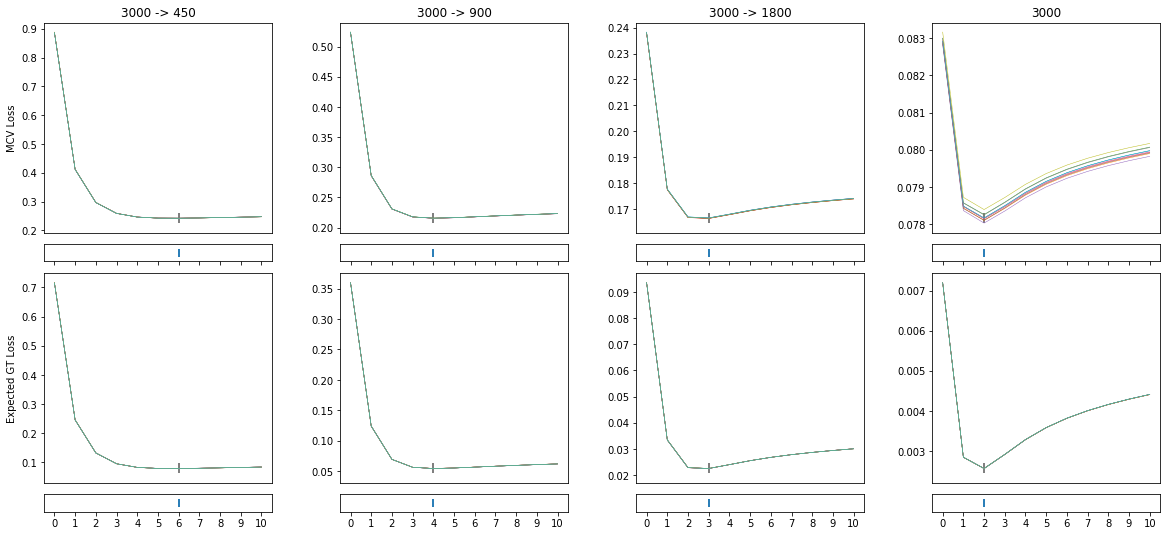

In [7]:
fig,ax = plt.subplots(
    4, 4, figsize=(20, 9), sharex="col",
    gridspec_kw={"wspace": 0.3, "hspace": 0.1, "height_ratios": [12, 1, 12, 1]}
)


for i,key in enumerate(("neuron_diffusion_mse_0_0.15", "neuron_diffusion_mse_0_0.3", "neuron_diffusion_mse_0_0.6", "neuron_diffusion_mse_0")):
    df = results[key]

    for j,loss in zip((0, 2), ("mcv_loss", "gt1_loss")):
        x = df["param_range"].copy()

        if df[loss].ndim == 1:
            y = df[loss][:, None]
        else:
            y = df[loss].T

        ax[j, i].plot(np.arange(len(x)), y, linewidth=0.5)
        ax[j, i].set_xticks(np.arange(len(x)))
        ax[j, i].tick_params(bottom=False)
        ax[j, i].scatter(y.argmin(0), np.ones(y.shape[1]) * y.min(0).mean(), marker="|", s=100,  color="grey")

        ax[j + 1, i].violinplot(y.argmin(0), vert=False)
        ax[j + 1, i].tick_params(left=False, labelleft=False)
        ax[j + 1, i].set_xticklabels(x)
        

for i,lbl in enumerate(("3000 -> 450", "3000 -> 900", "3000 -> 1800", "3000")):
    ax[0, i].set_title(lbl)

for j,lbl in zip((0, 2), ("MCV Loss", "Expected GT Loss")):
    ax[j, 0].set_ylabel(lbl)

plt.savefig("../figures/Figure_S-TK6_raw.svg")
plt.show()